<a href="https://colab.research.google.com/github/jon-chun/sentiment_cruxes/blob/main/sa_gutenberg_class_Nov1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jon Chun
24 Oct 2021

# **Setup and Configuration**

In [1]:
!pip install texthero

     |████████████████████████████████| 235 kB 17.4 MB/s 
     |████████████████████████████████| 1.5 MB 39.0 MB/s 
     |████████████████████████████████| 748 kB 40.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import string
import re

In [4]:
from google.colab import files

In [5]:
%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

# **Get the Novel Text**

## **OPTION (a): Connect and Read from gDrive** *italicized text*

(Upload novel textfile to Google Drive under root folder **./MyDrive** first)

In [8]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [9]:
!ls

MyDrive  Othercomputers


In [10]:
%cd ./MyDrive/

/gdrive/MyDrive


In [11]:
!ls

 05133.pdf
 05-ls.pdf
 1204.4809.pdf
 1802.01405v1.pdf
 1805.00705v2.pdf
 1907.06902.pdf
 1-s2.0-S0957417420310162-main.pdf
'1-s2 (1).0-S0957417420310162-main.pdf'
 2001.08210.pdf
 2002.09419.gdoc
 2002.09419.pdf
 20190113124834720.pdf
 2019_10_18_machinelearning_working_group.ppt
'2019 Apr Tech Notes.gdoc'
'2019 Feb Tech Notes.gdoc'
'2019 Jan Tech Notes.gdoc'
'2019 June Tech Notes.gdoc'
'2019 Mar Tech Notes.gdoc'
'2019 May Tech Notes.gdoc'
'2019 Spring Programming Humanity.gdoc'
 202006_nlg_theater.gdoc
 2102.07350v1.pdf
 3sentiments_5woolf_palefire_20191031.ipynb
 505242966.pdf
'ADHO 2019 Proposal.gdoc'
'ai4hum_lab_20191022_Discovering and Visualizing Topics in Texts with LDA_20191019_master.ipynb'
 ai4hum_lab_20191022_sentiment_lda_gutenberg_master.ipynb
 ai4hum_lab_20191022_topic-modeling-with-colab-gensim-mallet.ipynb
 ai4hum_lab_20191028_lda_topic_modeling_palefire.ipynb
'AI and the Liberal Arts: Computational Humanities_20190529.gdoc'
'AI and the Liberal Arts: Computational Huma

In [12]:
# %cd ./research/2021/sa_book_code/books_sa/jkrowling_1sorcerersstone/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/jkrowling_1sorcerersstone


In [13]:
!ls *.txt

cruxes_context.txt			     hpotter1_sorcerersstone.txt
hpotter1_sorcerers_stone_handclean_utf8.txt  jkrowling_1sorcerersstone.txt


In [14]:
novel_ls = []
novel_parags_ls = []

novel_filename = 'jkrowling_1sorcerersstone.txt'

In [7]:
#@title Enter the Novel_Title in the form [Title] by [Author]


Novel_Title = "Harry Potter and the Socerer's Stone by J.K. Rowling" #@param {type:"string"}

In [ ]:
# Read novel into list of Sentences/lines

with open(novel_filename, 'r') as fp:
  novel_ls = fp.readlines()

print(f'Line Count: {len(novel_ls)}')

Line Count: 6135


In [ ]:
# Read novel into list of Paragraphs

delimiter = "\n"

with open(novel_filename, "r") as fp:
  all_content = fp.read() #reading all the content in one step
  #using the string methods we split it
  novel_parags_ls = all_content.split(delimiter)
  novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 3068


In [ ]:
novel_parags_ls[:10]

['CHAPTER 1',
 'THE BOY WHO LIVED',
 "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 'Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 "The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's

In [ ]:
novel_ls[4]

"Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. \n"

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 8.5 MB/s 
     |████████████████████████████████| 284 kB 49.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=24c7db06253e688a658a1538ae55d8e2d264ba7f551dec15a20fac4e34ccc19f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions
contractions.fix("you're happy now")

'you are happy now'

In [ ]:
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]

['[CHAPTER 1]',
 '[THE BOY WHO LIVED]',
 '[Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.]',
 '[Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.]',
 "[The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was

In [ ]:
novel_clean_str = '\n'.join(novel_clean_ls)
print(novel_clean_str[:5000])

CHAPTER 1
THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but

In [ ]:
# novel_clean_ls[1] = "THE SILVER SPOON I was born twice: first, as a baby girl, on a remarkably smogless Detroit day in January of 1960; and then again, as a teenage boy, in an emergency room near Petoskey, Michigan, in August of 1974. Specialized readers may have come across me in Dr. Peter Luce’s study, “Gender Identity in 5-Alpha-Reductase Pseudohermaphrodites,” published in theJournal of Pediatric Endocrinology in 1975. Or maybe you’ve seen my photograph in chapter sixteen of the now sadly outdatedGenetics and Heredity."

In [ ]:
# novel_clean_ls.pop(0)

'ALSO BY JEFFREY EUGENIDES The Virgin SuicidesMIDDLESEXFarrar, Straus and Giroux 19 Union Square West, New York 10003  Copyright  2002 by Jeffrey Eugenides All rights reserved Published simultaneously in Canada by Alfred A. Knopf Canada, a division of Random House of Canada Limited, Toronto First edition, 2002  Portions of this novel appeared, in different form, inThe New Yorker andGranta .'

In [ ]:
novel_clean_ls[:10]

['CHAPTER 1',
 'THE BOY WHO LIVED',
 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.',
 'Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 "The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dur

In [ ]:
novel_clean_ls[-10:]

['"Very," said Harry. "Thanks for the fudge and the sweater, Mrs. Weasley."',
 '"Oh, it was nothing, dear."',
 '"Ready, are you?"',
 'It was Uncle Vernon, still purple-faced, still mustached, still looking furious at the nerve of Harry, carrying an owl in a cage in a station full of ordinary people. Behind him stood Aunt Petunia and Dudley, looking terrified at the very sight of Harry.',
 '"You must be Harry\'s family!" said Mrs. Weasley.',
 '"In a manner of speaking," said Uncle Vernon. "Hurry up, boy, we have not got all day." He walked away.',
 'Harry hung back for a last word with Ron and Hermione.',
 '"See you over the summer, then."',
 '"Hope you have -- er -- a good holiday," said Hermione, looking uncertainly after Uncle Vernon, shocked that anyone could be so unpleasant.',
 '"Oh, I will," said Harry, and they were surprised at the grin that was spreading over his face. "They do not know we are not allowed to use magic at home. I am going to have a lot of fun with Dudley this s

In [ ]:
# novel_clean_str = '\n'.join(novel_clean_ls)

# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

# print(novel_clean_str[:5000])

## OPTION (b): **Scrape Project Gutenberg**

**Goto *https://gutenberg.net.au* and find the *.HTML (not *.TXT) version of your novel**

In [7]:
from bs4 import BeautifulSoup

import requests

In [8]:
#@title Enter the URL of your novel at ***gutenberg.net.au***
#@markdown Paste the URL to the ***HTML version*** (not plain text).

Novel_Title = 'Frankenstein by Mary Shelley'  #@param {type: "string"}

Gutenberg_URL = 'https://gutenberg.net.au/ebooks/z00006.html'  #@param {type: "string"}


In [9]:
# Get raw HTML of novel from Gutenberg.net.au

response=requests.get(Gutenberg_URL)  # TODO: Pass the URL to the .get() method of the requests object
html = response.text

In [10]:
# View raw HTML that we need to clean up

# TODO: What is the difference between these two outputs?

# Option A: 
html

# Option B:
# print(html)

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\r\n<html>\r\n<head>\r\n<meta name="generator" content="HTML-Kit Tools HTML Tidy plugin">\r\n<title>Frankenstein</title>\r\n<meta http-equiv="Content-Type" content=\r\n"text/html; charset=iso-8859-1">\r\n<meta name="Author" content="">\r\n<meta name="Keywords" content="ebook ebooks etext etexts">\r\n<meta name="Description" content="free ebooks">\r\n<link rel="stylesheet" href="/pga-ebook.css" type="text/css">\r\n</head>\r\n<body>\r\n<!-- start googleads books -->\r\n<table align="center" border ="1" width="80%">\r\n<tr>\r\n<td align="center"><img src="/pga-australia.jpg" width="94" height="84" alt=""></td>\r\n<td align="center" bgcolor="#FFE4E1"><font color="#800000" size="5"><b><a href="http://gutenberg.net.au" target="_blank">Project\r\nGutenberg Australia</a><br>\r\n</b></font><font color="#800000" size="4"><i>a treasure-trove of literature</i><br>\r\n</font>treasure found hidden with no evidence of ownership</td>\r\n<

# **Trim Novel Text**

## **Using Beautiful Soup**

In [11]:
#Create a BeautifulSoup object from the HTML

soup = BeautifulSoup(html, "html.parser")


paragraph=soup.find_all("p")  # TODO: get all the <P>Paragraphs</P> 
                                #       see bs4 API ref: https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects
parag_ls = []
for para in paragraph:
    parag_ls.append(para.text)

print(f'There were {len(parag_ls)} Paragraphs:\n') # TODO how do you get the number of paragraphs in the list parag_ls?

print(f"First 3 Paragraphs: ==============================    \n")
print(f"    {list(print(x) for x in parag_ls[:3])}\n")  # TODO: Give index to retrieve the first 3 paragraphs

print(f"Last 3 Paragraphs: ============================== \n")
print(f"    {list(print(x) for x in parag_ls[-3:])}\n")  # TODO: Give index to retrieve the last 3 paragraphs


There were 657 Paragraphs:

First 3 Paragraphs: ==============================    

 
St. Petersburgh, Dec. 11th, 17—
To Mrs. Saville, England
    [None, None, None]

Last 3 Paragraphs: ============================== 

He sprang from the cabin window as he said this, upon the ice
raft which lay close to the vessel. He was soon borne away by the
waves and lost in darkness and distance.
 
This site is full of FREE ebooks - Project Gutenberg Australia
    [None, None, None]



## **Using Python [string].partition() or RegEx**

In [12]:
# Concatenate all paragraphs into a single novel string

# For every paragraph, replace all hardcoded \r\n with a single space
parag_flat_ls = [re.sub(r'\r\n', ' ', aparag) for aparag in parag_ls]

# Concatenate all paragraphs into a single string, separated by \n
novel_str = '\n'.join(parag_flat_ls)

print('\nSTART OF NOVEL: -----')
print(novel_str[:1000] + '\n')

print('\nEND OF NOVEL: -----\n')
print(novel_str[-1000:])


START OF NOVEL: -----
 
St. Petersburgh, Dec. 11th, 17—
To Mrs. Saville, England
You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.
I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is forever visible, its broad

**Enter the First and Last several words to use as RegEx for trimming header/footers**

In [13]:
#@title Enter the first sentence in the body of your novel
sentence_first_str = 'St. Petersburgh, Dec. 11th'  #@param {type: "string"}

#@title Enter the last sentence in the body of your novel
sentence_last_str = 'waves and lost in darkness and distance.'  #@param {type: "string"}


In [14]:
# Strip off the header
novel_clean = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
' '.join(novel_clean.partition(sentence_last_str)[:2])[-500:]

'felt. Soon these burning miseries will be extinct. I shall ascend my funeral pile triumphantly and exult in the agony of the torturing flames. The light of that conflagration will fade away; my ashes will be swept into the sea by the winds. My spirit will sleep in peace, or if it thinks, it will not surely think thus. Farewell."\nHe sprang from the cabin window as he said this, upon the ice raft which lay close to the vessel. He was soon borne away by the  waves and lost in darkness and distance.'

In [15]:
# Strip off the header
novel_clean_str = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
novel_clean_str = ' '.join(novel_clean_str.partition(sentence_last_str)[:2])

# Verify

print('\nSTART OF CLEAN NOVEL: -----')
print(novel_clean_str[:1000] + '\n')

print('\nEND OF CLEAN NOVEL: -----\n')
print(novel_clean_str[-1000:])


START OF CLEAN NOVEL: -----
St. Petersburgh, Dec. 11th , 17—
To Mrs. Saville, England
You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.
I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is forever visible, its 

# **Split Novel into Sentences**

* https://github.com/zaemyung/sentsplit (CRF: mincut)

* https://github.com/adobe/NLP-Cube and Rank ~15 https://aclanthology.org/K18-2017.pdf

In [16]:
# Read novel into list of Paragraphs

delimiter = "\n"

novel_parags_ls = novel_clean_str.split(delimiter)
novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]
novel_parags_ls = [' '.join(x.split()) for x in novel_parags_ls]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 653


In [17]:
novel_parags_ls[:15]

['St. Petersburgh, Dec. 11th , 17—',
 'To Mrs. Saville, England',
 'You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.',
 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is forever visible, its broad disk just

In [18]:
for i,aline in enumerate(novel_parags_ls):
  if (len(aline.strip()) < 5):
    print(f'Line #{i}: {aline}')

Line #24: R.W.


In [19]:
novel_clean_str = '\n'.join(novel_parags_ls)
novel_clean_str[:2000]

'St. Petersburgh, Dec. 11th , 17—\nTo Mrs. Saville, England\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is forever visible, its broad disk just skirting 

In [20]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
novel_sents_ls = sent_tokenize(novel_clean_str)

sent_ct = len(novel_sents_ls)
sent_show = 10

print('\nFirst Sentences: -----\n')
# for i, asent in enumerate(novel_sents_ls[:sent_show]):
for i, asent in enumerate(novel_sents_ls[:sent_show]):
  print(f'Sentences #{i}: {asent}')


print('\nLast Sentences: -----\n')
for i, asent in enumerate(novel_sents_ls[-sent_show:]):
  print(f'Sentences #{sent_ct - (sent_show - i)}: {asent}')


print(f'\n\nThere are {sent_ct} Sentences in the novel')


First Sentences: -----

Sentences #0: St. Petersburgh, Dec. 11th , 17—
To Mrs. Saville, England
You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.
Sentences #1: I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.
Sentences #2: I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.
Sentences #3: Do you understand this feeling?
Sentences #4: This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.
Sentences #5: Inspirited by this wind of promise, my daydreams become more fervent and vivid.
Sentences #6: I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imag

In [22]:
# View the Sentences that have no letters in them

[x.strip() for x in novel_sents_ls if not re.search('[a-zA-Z]', x)]

[]

In [23]:
# Delete the short Sentences and those without any alphabetic characters

novel_sents_ls = [x.strip() for x in novel_sents_ls if len(x.strip()) > 2]
novel_sents_ls = [x.strip() for x in novel_sents_ls if re.search('[a-zA-Z]', x)]
len(novel_sents_ls)

3171

In [24]:
# View the shortest Setences

sorted(novel_sents_ls, key=len)[:100]
# type(min(novel_sents_ls, key=len))
# novel_sents_ls[:1000]

['Oh!',
 'No!',
 'No!',
 'Ah!',
 'Oh!',
 'Oh!',
 'Ah!',
 'Ah!',
 'Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'R.W.',
 '"Ah!',
 'Man!',
 '"Oh!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 'Alas!',
 '"Yes."',
 '"Alas!',
 '"Alas!',
 '"Alas!',
 '"Alas!"',
 'Begone!',
 'Begone!',
 'Begone!',
 'Oh, no!',
 'I said.',
 'Despair!',
 'And, oh!',
 '"Begone!',
 'He came.',
 'Clerval!',
 '"Begone!',
 'said he.',
 'Good God!',
 'Good God!',
 'Save me!"',
 'Good God!',
 'She wept.',
 'said she.',
 'said she.',
 'said she.',
 '"Wretch!"',
 'Beautiful!',
 'Great God!',
 'Who was I?',
 "'Come in.'",
 '"I paused.',
 'Oh, earth!',
 'Let me go.',
 'I replied.',
 'Great God!',
 'Great God!',
 'Great God!',
 '"Farewell!',
 'Farewell."',
 'I trembled.',
 'What was I?',
 'What was I?',
 '"I knocked.',
 '"I entered.',
 'We sat late.',
 'Oh, save me!',
 'One subject!',
 'Do not fear.',
 'But hear me.',
 'Ugly wretch!',
 'I was moved.

In [25]:
len(novel_sents_ls)

3171

# **Clean and Slice Strings**

In [26]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
hero.get_default_pipeline()

[<function texthero.preprocessing.fillna>,
 <function texthero.preprocessing.lowercase>,
 <function texthero.preprocessing.remove_digits>,
 <function texthero.preprocessing.remove_punctuation>,
 <function texthero.preprocessing.remove_diacritics>,
 <function texthero.preprocessing.remove_stopwords>,
 <function texthero.preprocessing.remove_whitespace>]

In [28]:
# Texthero works on Pandas Series

novel_df = pd.DataFrame({'text_raw': novel_sents_ls})
novel_df.head()

,text_raw
0,"St. Petersburgh, Dec. 11th , 17—\nTo Mrs. Savi..."
1,"I arrived here yesterday, and my first task is..."
2,"I am already far north of London, and as I wal..."
3,Do you understand this feeling?
4,"This breeze, which has travelled from the regi..."


In [29]:
# Convert string column/Series from 'object' to 'string'

novel_df['text_raw'] = novel_df['text_raw'].astype('string')
novel_df['text_raw'] = novel_df['text_raw'].str.strip()

novel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text_raw  3171 non-null   string
dtypes: string(1)
memory usage: 24.9 KB


In [30]:
# Use texthero.clean() to clean the 'text_raw' column and create the 'text_clean' column

novel_df['text_clean'] = hero.clean(novel_df['text_raw'])
novel_df.head()

,text_raw,text_clean
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...
3,Do you understand this feeling?,understand feeling
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...


In [31]:
novel_df.shape

(3171, 2)

In [32]:
novel_df.head()

,text_raw,text_clean
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...
3,Do you understand this feeling?,understand feeling
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...


In [33]:
# Delete the (near)null Sentences

novel_df['text_raw_len'] = novel_df['text_raw'].apply(lambda x : len(x.strip()))
novel_df.head()
novel_df.shape

(3171, 3)

In [34]:
# View the shortests Sentences before and after cleaning

novel_df.sort_values(by=['text_raw_len']).head(400)

,text_raw,text_clean,text_raw_len
2837,Oh!,oh,3
1026,No!,,3
2952,Oh!,oh,3
1027,No!,,3
2606,Ah!,ah,3
...,...,...,...
968,I passed a night of unmingled wretchedness.,passed night unmingled wretchedness,43
1903,I do not intend to hurt you; listen to me.',intend hurt listen,43
1767,I thank you and accept your generous offer.,thank accept generous offer,43
997,"""Why did you rob me of my last consolation?",rob last consolation,43


In [35]:
novel_df['text_raw_len'].value_counts().sort_values(na_position='first')[:50]

865    1
373    1
381    1
258    1
387    1
389    1
391    1
363    1
413    1
431    1
433    1
447    1
503    1
521    1
531    1
429    1
298    1
555    1
341    1
296    1
355    1
353    1
294    1
286    1
347    1
329    1
331    1
339    1
359    1
312    1
592    1
311    1
304    1
303    1
301    1
299    1
316    1
291    1
322    1
324    1
326    1
328    1
271    1
267    1
342    1
346    1
295    1
364    1
348    1
512    1
Name: text_raw_len, dtype: int64

In [36]:
# Drop Sentence if Raw length < 2

novel_df = novel_df[novel_df['text_raw_len'] > 2]
novel_df.shape

(3171, 3)

In [37]:
novel_df.text_clean = novel_df.text_clean.astype('string')
novel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_raw      3171 non-null   string
 1   text_clean    3171 non-null   string
 2   text_raw_len  3171 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 99.1 KB


In [38]:
novel_df.sort_values(by=['text_raw_len']).head(20)

,text_raw,text_clean,text_raw_len
2837,Oh!,oh,3
1026,No!,,3
2952,Oh!,oh,3
1027,No!,,3
2606,Ah!,ah,3
3088,Oh!,oh,3
2860,Oh!,oh,3
1131,Ah!,ah,3
2878,Oh!,oh,3
2645,Ah!,ah,3


# **Sentiment Analysis**

## **VADER**

In [39]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 15.3 MB/s 


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

In [41]:
vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [42]:
novel_df['vader'] = novel_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
novel_df.head(100)

,text_raw,text_clean,text_raw_len,vader
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...,201,-0.7650
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...,145,0.9001
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...,179,0.7096
3,Do you understand this feeling?,understand feeling,31,0.1280
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...,121,0.0000
...,...,...,...,...
95,"Remember me with affection, should you never h...",remember affection never hear,64,0.5267
96,"Your affectionate brother, Robert Walton July ...",affectionate brother robert walton july 7th --...,178,0.8885
97,This letter will reach England by a merchantma...,letter reach england merchantman homeward voya...,170,0.4588
98,"I am, however, in good spirits: my men are bol...",however good spirits men bold apparently firm ...,231,-0.1280


## **TextBlob**

In [43]:
from textblob import TextBlob

In [44]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment.polarity)

0.39166666666666666


In [45]:
novel_df['textblob'] = novel_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...,201,-0.7650,-1.000
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...,145,0.9001,0.275
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...,179,0.7096,-0.250
3,Do you understand this feeling?,understand feeling,31,0.1280,0.000
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...,121,0.0000,-0.100


# **Plot Sentiment**

In [46]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...,201,-0.7650,-1.000
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...,145,0.9001,0.275
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...,179,0.7096,-0.250
3,Do you understand this feeling?,understand feeling,31,0.1280,0.000
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...,121,0.0000,-0.100


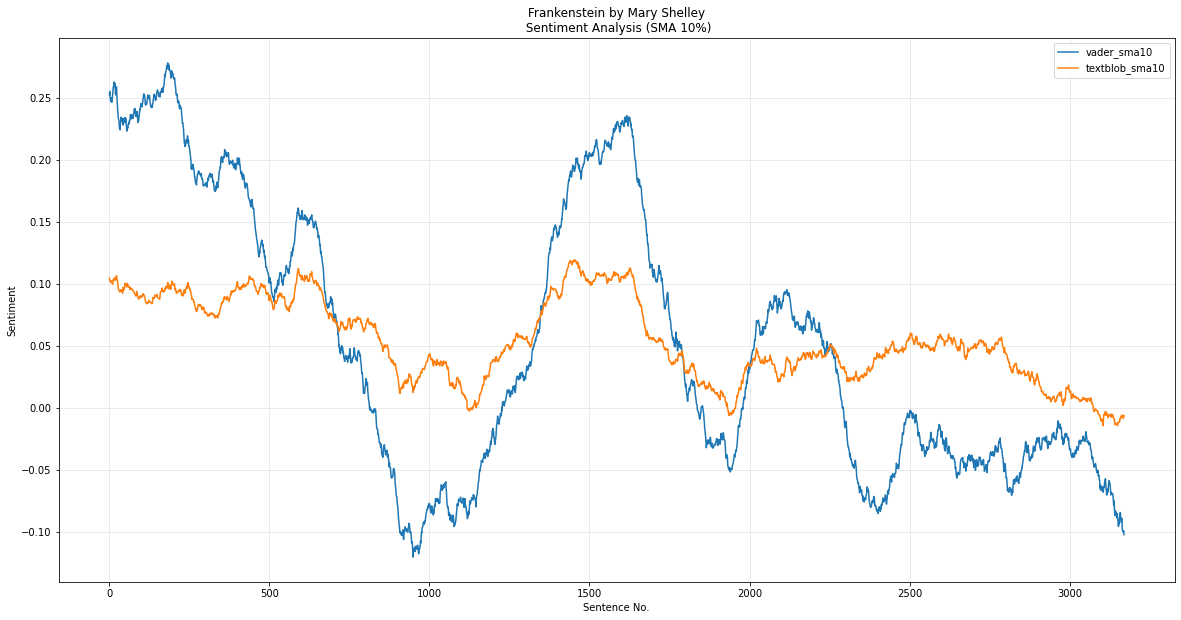

In [47]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_xper = int(window_percent/100 * novel_df.shape[0])

vader_col = f'vader_sma{window_percent}'
novel_df[vader_col] = novel_df['vader'].rolling(win_xper, center=True, min_periods=1).mean()

textblob_col = f'textblob_sma{window_percent}'
novel_df[textblob_col] = novel_df['textblob'].rolling(win_xper, center=True, min_periods=1).mean()
novel_df.plot(y=[vader_col, textblob_col])

plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%)')
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show();

In [48]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,vader_sma10,textblob_sma10
0,"St. Petersburgh, Dec. 11th , 17— To Mrs. Savil...",st petersburgh dec 11th -- mrs saville england...,201,-0.7650,-1.000,0.252888,0.104783
1,"I arrived here yesterday, and my first task is...",arrived yesterday first task assure dear siste...,145,0.9001,0.275,0.255684,0.103816
2,"I am already far north of London, and as I wal...",already far north london walk streets petersbu...,179,0.7096,-0.250,0.251029,0.103171
3,Do you understand this feeling?,understand feeling,31,0.1280,0.000,0.250577,0.101608
4,"This breeze, which has travelled from the regi...",breeze travelled regions towards advancing giv...,121,0.0000,-0.100,0.247506,0.101821


# **Crux Detection**

## **Scipy Signal Find_Peaks**

* https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy

In [49]:
from scipy.signal import find_peaks

In [50]:
#@title Which Lexicon?

Sentiment_Model = "VADER" #@param ["VADER", "TextBlob"]

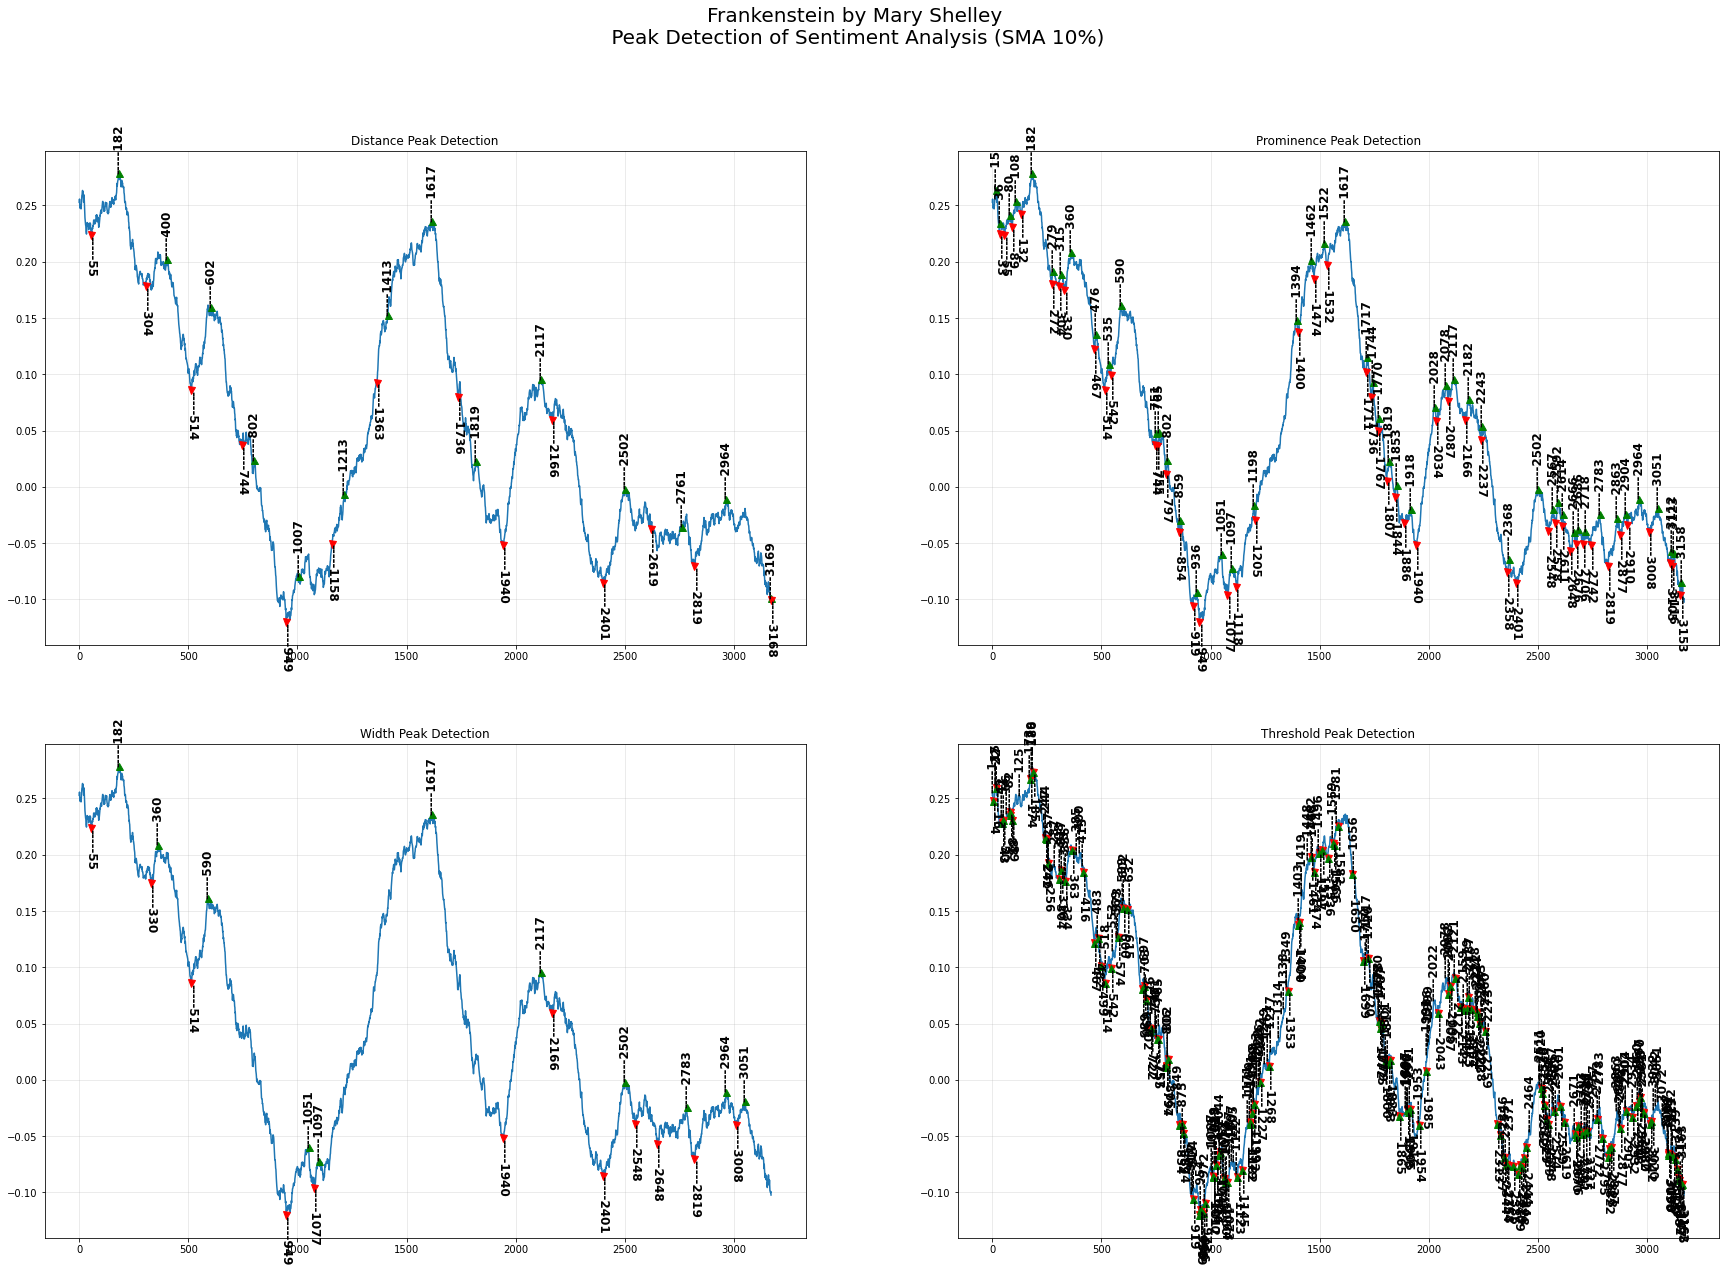

In [53]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 200 #@param {type:"slider", min:100, max:1000, step:10}
Prominence_Min = 0.01 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 25 #@param {type:"slider", min:25, max:500, step:5}
Threshold_Min = 0.0016 #@param {type:"slider", min:0.0001, max:0.002, step:0.0001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = novel_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in novel_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


plt.subplot(2, 2, 1)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title('Distance Peak Detection')
plt.plot(peaks, x[peaks], "^g", markersize=7)
plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.subplot(2, 2, 2)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title('Prominence Peak Detection')
plt.plot(peaks2, x[peaks2], "^g", markersize=7)
plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 3)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title('Width Peak Detection')
plt.plot(valleys3, x[valleys3], "vr", markersize=7)
plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 4)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title('Threshold Peak Detection')
plt.plot(valleys4, x[valleys4], "vr", markersize=7)
plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.suptitle(f'{Novel_Title}\n Peak Detection of Sentiment Analysis (SMA {window_percent}%)', fontsize=20)
plt.grid(True, alpha=0.3)

plt.show()

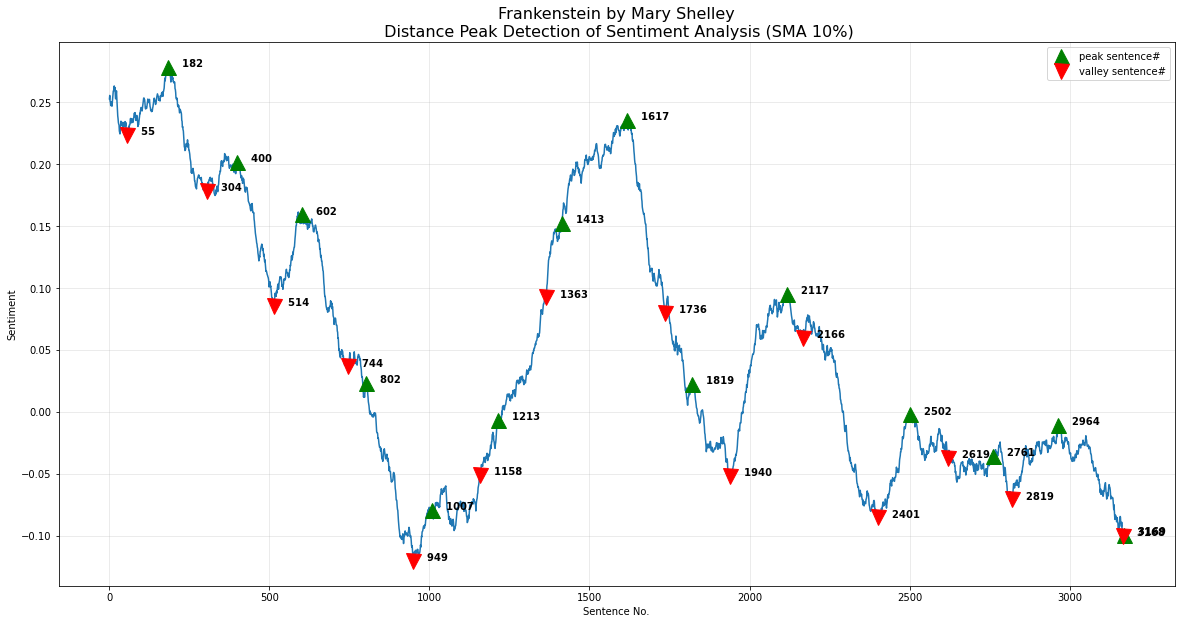



     >>>>> SAVED PLOT TO FILE: [cruxes_plot_Frankenstein_by_Mary_Shelley.png] <<<<<


In [54]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Distance" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

plt.plot(x)
plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title(f'{Novel_Title}\n {Peak_Algorithm} Peak Detection of Sentiment Analysis (SMA {window_percent}%)', fontsize=16)
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

filename_plot = f"cruxes_plot_{Novel_Title.replace(' ', '_')}.png"
plt.savefig(filename_plot, dpi=300)
plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [55]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [56]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 10 #@param {type:"slider", min:1, max:20, step:1}


**[NOTE] May have to run 2-3x times to save file**

In [65]:
peaks

array([ 182,  400,  602,  802, 1007, 1213, 1413, 1617, 1819, 2117, 2502,
       2761, 2964, 3169])

In [63]:
%%capture cap --no-stderr

# Print Context around each Sentiment Peak

novel_sent_len = novel_df.shape[0]
halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  crux_sents_ls = []
  win_start = max(0, apeak-halfwin)
  win_end = min(apeak+halfwin+1, novel_sent_len)
  # for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
  for sent_idx in range(win_start,win_end):

    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = novel_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')


# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  crux_sents_ls = []
  win_start = max(0, avalley-halfwin)
  win_end = min(avalley+halfwin+1, novel_sent_len)
  # for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
  for sent_idx in range(win_start,win_end):
    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"cruxes_context_{Novel_Title.replace(' ', '_')}.txt" 

with open(filename_cruxes, 'w') as f:
    f.write(str(cap))

In [66]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **END OF NOTEBOOK**